In [11]:
import numpy as np
import pandas as pd
import json
import codecs
import datetime
import os
import sys

In [23]:
sys.path.append('.')

In [25]:
import matplotlib as mpl
import matplotlib.pyplot as plt


In [26]:
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.graphics.tsaplots import plot_acf

In [27]:
def plot_df(df, x, y, title="", xlabel='Date', ylabel='Value', dpi=100):
    plt.figure(figsize=(16,9), dpi=dpi)
    plt.plot(x, y, color='tab:blue')
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.show()

In [2]:
path = '/Users/smuel/AndroidStudioProjects/LuckyMeIntgratedSDK/metadata_init_phase/'

In [43]:
from statsmodels.tsa.seasonal import seasonal_decompose


In [44]:
res = seasonal_decompose(df.CALL_DURATION, model='additive', period=1)

In [45]:
y = df.groupby(pd.Grouper(key='CALL_DATE_TIME', freq='D')).agg({'CALL_NUMBER' : ['count']}).to_numpy().T[0]

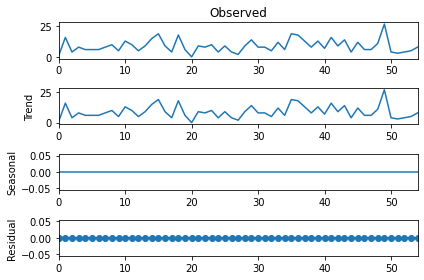

In [46]:
res = seasonal_decompose(y, model='additive', period=1)
res.plot()
plt.show()

In [1]:
from vector_creator.raw_to_df.rawdata_to_df import create_df_from_init_metadata, list_of_json_files 
from vector_creator.score_vectors.score_vectors_assembly import run_score_vector, score_vector_constructor, score_vector_for_init_metadata
from vector_creator.preprocess.utils import calc_number_of_days

In [2]:
path = '/Users/smuel/AndroidStudioProjects/LuckyMeIntgratedSDK/metadata_init_phase/'

In [3]:
res1 = score_vector_constructor(path, 'call-logs')

call-logs:  493
05fa68e5-0ba3-4783-9c07-42740c4914c6 processed
call-logs:  3
12fa7561-2e77-4334-b9e1-6858ed27570f to small to process
call-logs:  1400
1362474c-0fb5-4932-a33d-5a30f23ac7e3 processed
call-logs:  189
17ac0e20-b292-492c-9adc-faf60a068926 processed
call-logs:  813
199ea69c-5e20-4b53-9bfb-0534aaeb68d6 processed
call-logs:  1049
1abd59a3-553f-43db-a329-90c28c72afdd processed
call-logs:  2000
20380cd2-055e-4f3a-a339-90a1c7df4e1a processed
call-logs:  2500
236b91d2-cefb-405a-9de5-a3673ef1c736 processed
call-logs:  38
25174909-3427-42d2-9e14-65f7c95f240b processed
call-logs:  15
25ba2284-51e3-4eb9-a2c8-fa3a0eaeeca9 to small to process
call-logs:  2710
2afbf7b0-6202-49bb-814f-ddba906bab48 processed
call-logs:  0
2afc4c23-161f-4fc5-b4ba-e567f5327d22 to small to process
call-logs:  217
36f05b2e-4164-49a6-ba0c-d78997ecdcae to small to process
call-logs:  277
3e4c39d0-d2ec-45c3-91cc-4c80ccf171be processed
call-logs:  24
588aeafe-5c4d-4bc9-84c5-8ae28029c733 to small to process
call-lo

In [4]:
len(res1)

12

In [5]:
len(res1.columns)

61

In [6]:
res1.to_csv('/Users/smuel/AndroidStudioProjects/LuckyMeIntgratedSDK/score_vec_pg.csv')

In [7]:
rows_with_nan = [index for index, row in res0.iterrows() if row.isnull().any()]

In [8]:
rows_with_nan

[]

In [3]:
import oci
import json
from oci.config import validate_config

In [9]:
rdata = list_of_json_files(path)

In [10]:
rdata[16][0]

'6ff9fca8-f981-46e5-93cc-4fab4190d758'

In [11]:
loc, r_df = create_df_from_init_metadata(rdata[16][0], rdata[16][1])

In [12]:
r_df.keys()

dict_keys(['6ff9fca8-f981-46e5-93cc-4fab4190d758_CallLogs', '6ff9fca8-f981-46e5-93cc-4fab4190d758_ImgMetaData', '6ff9fca8-f981-46e5-93cc-4fab4190d758_InstallApps'])

In [18]:
cl_df = r_df['6ff9fca8-f981-46e5-93cc-4fab4190d758_CallLogs']

In [22]:
(cl_df['CALL_DURATION'] == '0').sum()

25

In [20]:
cl_df['CALL_TYPE'].isnull().sum()

19

In [11]:
from vector_creator.preprocess.ivi_irregularity import *

In [12]:
ivi = IVI2('CALL_DATE_TIME','CALL_DURATION', 'CALL_NUMBER', 'CALL_TYPE', 'D', 'W')

In [23]:
float(19/len(cl_df)) > 0.5 and float(25/len(cl_df)) > 0.5

True

In [14]:
fg_df = r_df['6ff9fca8-f981-46e5-93cc-4fab4190d758_ImgMetaData']

In [17]:
fg_df['IMAGE_TYPE'] = fg_df['IMAGE_TYPE'].apply(lambda x : x.split('/')[1] if len(x.split('/')) == 2 else x) 

In [19]:
fg_df.head(10)

IMAGE_TYPE     IMAGE_DATE_TIME
0       jpeg 2020-03-05 12:06:04
1       jpeg 2020-03-05 12:06:08
2       jpeg 2020-07-18 13:24:41
3       jpeg 2020-03-16 13:52:53
4       jpeg 2020-03-23 11:32:25
5        png 2020-03-26 13:57:43
6        png 2020-03-26 13:57:46
7       jpeg 2020-03-26 13:57:48
8       jpeg 2020-03-26 21:57:48
9       jpeg 2020-07-09 01:47:37

In [10]:
dft = pd.DataFrame({'a':[0,0,1,1], 'b':[0,1,0,1]})
dft[(dft.T != 0).any()]

a  b
1  0  1
2  1  0
3  1  1

In [16]:
dft1 = dft[dft['b']!=0]

In [17]:
dft1

a  b
1  0  1
3  1  1

In [12]:
m = np.array([float(-1.0)])

In [14]:
m.any()

True

In [15]:
m

array([-1.])

In [16]:
m == np.array([-1.0])

array([ True])

In [17]:
m.shape

(1,)

In [19]:
m.shape != (1,)

False

In [7]:
a = [1,2,3,4,5]
print(a[0:2])

[1, 2]
